<h2><center><strong>Ecole Polytechnique de Tunisie</strong></center></h2> 
<img src="EPT.jpg" style="width:80px;height:80px" >


<h1><center>Communication numérique</center></h1>
<h2><center><em>Compte rendu du TP 1 : Outils pour la simulation de chaînes de communications numériques.</em></center></h2>
<h3><center><em>Réalisé par :</em> <font color='blue'> Naim Houes & Malek Mechergui</font></center></h3> 


## Objectif 
Le but de ce TP est de se familiariser avec quelques notions essentielles de communications numériques par le biais de la simulation sous Python.


Importer les bibliothèques nécessaires au travail.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sympy as sp
import warnings 
warnings.filterwarnings("ignore")

random.seed(20)

## Introduction 
Nous souhaitons transmettre sur un canal de type $BBAG$ (Bruit Blanc Additif Gaussien) une suite de symboles {$a_k$} d’information à la cadence $1/T_b$ comme le montre la figure ci dessous.

<img src="fig.png" style="width:550px;height 250px" >

Dans ce TP, nous allons étudier chaque bloc constituant la chaîne de transmission numérique représentée par cette figure.


## Partie I

##### 1. Génération de N échantillons d’une source binaire, avec N est le nombre de bits à émettre.

In [2]:
N = 100
s = np.array([random.randint(0,1) for x in range(N)])

#####  2. Codage de Gray des bits générés par la source binaire en symboles $a_k$ dans l'alphabet M-aire { $ ±A,±3A,···,±(M −1)A $ } avec A>0. On se limitera ici au cas où M = 2, donc $a_k$ = ±1.

In [3]:
M = 2
A = 1.0

a = 2*A*s - A
print("Les bits générés par la source codés avec A = 5 :\n",a)

Les bits générés par la source codés avec A = 5 :
 [-1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.
  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.
 -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.
  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.]


Echantillonage du signal en temps discret obtenu à la fréquence d'échantillonage $f_e$ = $F/T_b$ où $F = 8$. 
Ceci revient à insérer $F-1$ zéros entre deux symboles consécutifs. 

In [4]:
F = 8 
echant = np.zeros(N*F)
for i in range(N) :
    echant[8*i] = a[i]

#####  3. Représentation du signal échantilloné obtenu

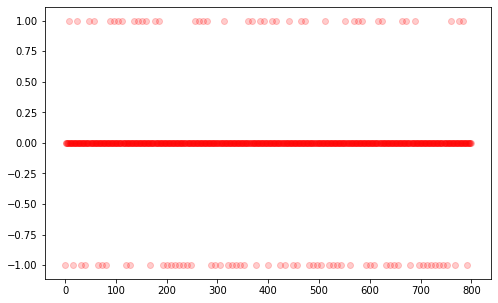

In [5]:
l = [ x for x in range(len(echant))]

plt.figure(figsize=(8,5))
plt.scatter(l, echant,alpha =0.2 , c = 'r')
plt.show()

On constate une concentartion des points au niveau du 0 due au sur-échantillonage qu'on a effectué avec le coefficient $F$. 
On voit également nos deux symboles codés en ±5.

# Partie II

On va simuler le filtre de mise en forme en racine de cosinus surélevé, couramment utlisé dans les chaînes de communications numériques dont l'expression de réponse implusionnelle est  : 

$$ g(t) = \frac{1}{\sqrt{T_b}} \: \frac{\sin(\frac{\pi \: t}{T_b}\:(1-\alpha))+\frac{4 \: \alpha t}{T_b} \cos(\frac{\pi \: t}{T_b}\:(1+\alpha))}{\frac{\pi \: t}{T_b} \: (1-(\frac{4 \: \alpha \: t}{T_b})^{2})} $$

$\alpha$ : coefﬁcient de retombé (roll-off) compris entre 0 et 1.

On fixera $T_b = 1$.

$g(t)$ est  de durée infinie et présente trois formes indéterminées en $t = 0$, $t=$ ± $\frac{T_b}{4α}$.

#####  1. Etude et calcul des limites de $g(t)$ au voisinage de ses trois formes indéterminées.

Dans la suite, nous allons définir deux fois la fonction $g(t)$, dans la première défintion ($g(t,\alpha,T_b)$) nous allons utiliser la bibliotheque $sympy$ (abrégé : sp) nécessaire pour le calcul des limites et dans la deuxième définition ($g1(t,\alpha,T_b)$) nous avons utilisé bibliotheque $numpy$ (abrégé : np) et avec cette deuxième définition nous allons faire les plots et les differentes opérations de calcul sur $g(t)$.

In [6]:
def g(t, alpha, Tb = 1) :
    
    return (1/sp.sqrt(Tb))*(sp.sin((np.pi*t)/(Tb)*(1 - alpha)) + ((4*alpha*t)/Tb) * sp.cos((np.pi*t)/(Tb)*(1 + alpha)))/((sp.pi*t)/(Tb) * (1 - ((4*alpha*t)/Tb)**2))
    

In [7]:
Tb = 1

t = sp.symbols('t')
alpha = sp.symbols('alpha')

t1 = 0
t2 = Tb/(4*alpha)
t3 = -Tb/(4*alpha)

In [8]:
lim1 = sp.limit(g(t,alpha), t, t1)
print('Limite de g(t) en 0 :')
lim1

Limite de g(t) en 0 :


1.0*(0.858407346410207*alpha + 3.14159265358979)/pi

$g(t)$ possède une limite finie en 0, elle est continue en 0 donc prolongeable par continuité en 0.

In [9]:
lim2 = sp.limit(g(t,alpha), t, t2)
print('Limite de g(t) en t2 :')
lim2

Limite de g(t) en t2 :


-oo*sign(-sin(0.785398163397448 - 0.785398163397448/alpha) + cos(0.785398163397448 + 0.785398163397448/alpha))

Au voisinage $\frac{T_b}{4α}$, $g(t)$ possède une branche infinie de direction l'axe des ordonnées.

In [10]:
lim3 = sp.limit(g(t,alpha), t, t3)
print('Limite de g(t) en t2 :')
lim3

Limite de g(t) en t2 :


oo*sign(-sin(0.785398163397448 - 0.785398163397448/alpha) + cos(0.785398163397448 + 0.785398163397448/alpha))

Au voisinage $- \frac{T_b}{4α}$, $g(t)$ possède une branche infinie de direction l'axe des ordonnées.

#####  2. & 3. Pour les differentes valeurs de $\alpha =$ 0.1, 0.25 et 0.9, nous avons calculer et tracer la fonction $g(t)$ sur $[-K\:T_b, K\:T_b]$ où $K=8$.

In [11]:
def g1(t, alpha, Tb = 1) :
    
    return (1/np.sqrt(Tb))*(np.sin((np.pi*t)/(Tb)*(1 - alpha)) + ((4*alpha*t)/Tb) * np.cos((np.pi*t)/(Tb)*(1 + alpha)))/((np.pi*t)/(Tb) * (1 - ((4*alpha*t)/Tb)**2))
    

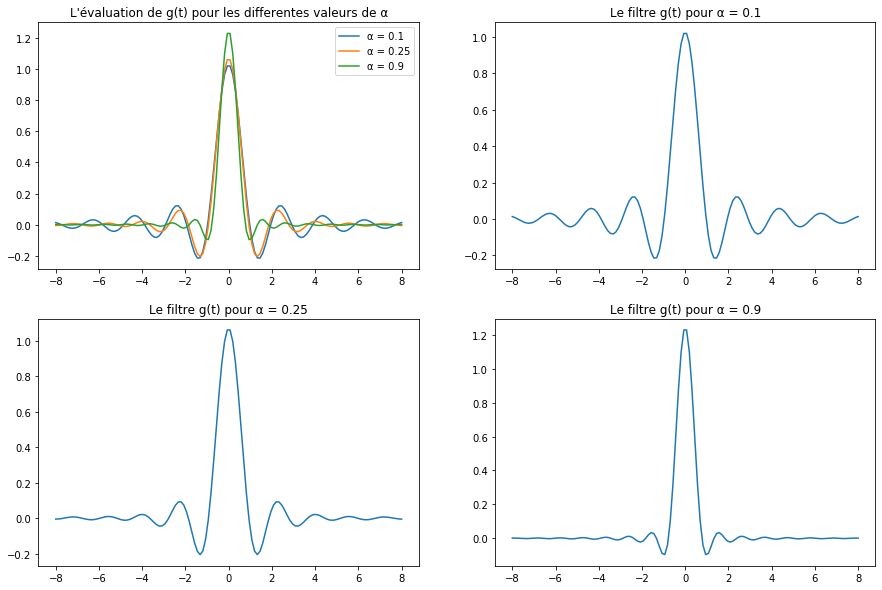

In [12]:
K = 8
alphas = [0.1 , 0.25, 0.9]
interv = np.linspace(-K*Tb, K*Tb, 128)
plt.figure(figsize=(15,10))
for i in alphas :
    plt.subplot(221)
    plt.plot(interv, g1(interv,i), label = '\u03B1 = ' + str(i))
    

plt.title("L'évaluation de g(t) pour les differentes valeurs de \u03B1")
plt.legend()

plt.subplot(222)
plt.plot(interv, g1(interv,0.1))
plt.title('Le filtre g(t) pour \u03B1 = 0.1')

plt.subplot(223)
plt.plot(interv, g1(interv,0.25), label = 'alpha = 0.25')
plt.title('Le filtre g(t) pour \u03B1 = 0.25')

plt.subplot(224)
plt.plot(interv, g1(interv,0.9), label = 'alpha = 0.9')
plt.title('Le filtre g(t) pour \u03B1 = 0.9')

plt.show()

Plus $\alpha$ augmente plus les oscillations et l'amplitude des lobes secondaires diminuent et plus l'amplitude du lobe primaire est importante et plus sa durée dans le temps est courte.

#####  4. Calcul de l'energie du filtre $g(t)$

In [13]:
E = (g1(interv, 0.25)**2).sum() 
print("L'énergie de g(t) = ", E)

L'énergie de g(t) =  7.937004936700781


On voit bien que l'energie du filtre échantilloné (pour les differentes valeurs de $\alpha$) est très proche du facteur de sur-échantillonage $F$.

#####  5. Génération d'une version échantillonnée du signal émis $e(t)$, qui n'est autre que le filtre de mise en forme appliqué au signal source. Ce signal émis $e(t)$ s'obtient en effectuant la convolution discrète des versions échantillonnées de $a(t)$ et $g(t)$ ($e(t) = \sum_{k}a_kg(t-kT_b)\ $).

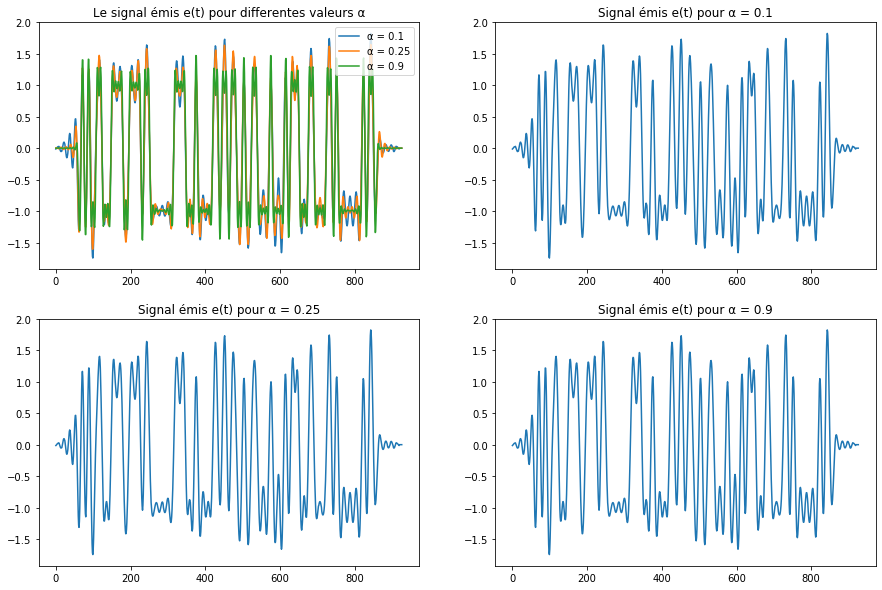

In [14]:
# la période d'echantillonage de echant est Tb/8 
# les echantillons de g(t) sont sur [-8Tb, 8Tb]
# cela nous fait 8*16 = 128 echantillons de echant 

plt.figure(figsize=(15,10))
ak = echant
interv = np.linspace(-K*Tb, K*Tb, 128)

for i in alphas : 
    plt.subplot(221)
    ex = np.convolve(ak,g1(interv,i)) 
    plt.plot(ex, label = '\u03B1 = ' + str(i))
    
plt.title('Le signal émis e(t) pour differentes valeurs \u03B1')
plt.legend()

plt.subplot(222)
e1 = np.convolve(ak,g1(interv,0.1)) 
plt.plot(e1)
plt.title('Signal émis e(t) pour \u03B1 = 0.1')

plt.subplot(223)
e2 = np.convolve(ak,g1(interv,0.25)) 
plt.plot(e1)
plt.title('Signal émis e(t) pour \u03B1 = 0.25')

plt.subplot(224)
e3 = np.convolve(ak,g1(interv,0.9)) 
plt.plot(e1)
plt.title('Signal émis e(t) pour \u03B1 = 0.9')

plt.show()
    

## Partie III

#####  1. Génération d'un bruit Gaussien de moyenne nulle qu'on ajoute à notre signal émis $e(t)$.

In [15]:
def bruit(SNR, e):
    
    N = len(e)
    N0 = (10**(-SNR/10))*F
    sigma = N0/2
    bruit_gaussien = np.random.normal(0,sigma,N)
    return (e + bruit_gaussien)


Visualisation du signal bruité (signal émis + bruit) pour des differentes valeurs du $SNR$ $(Signal-Noise-Ratio)$ et pour un $\alpha = 0.25$ :

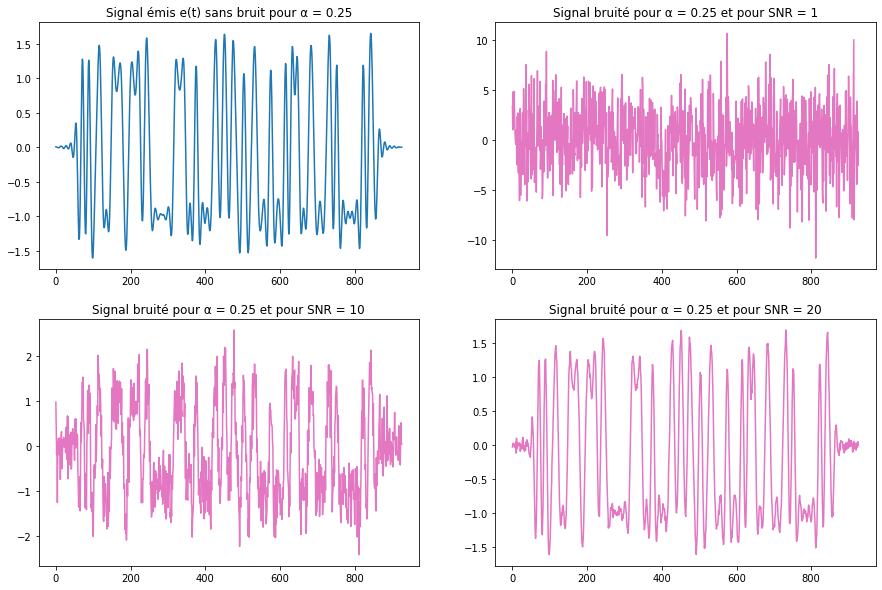

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.plot(e2)
plt.title('Signal émis e(t) sans bruit pour \u03B1 = 0.25')

plt.subplot(222)
SNR = 1
plt.plot(bruit(SNR, e2), '#e377c2')
plt.title('Signal bruité pour \u03B1 = 0.25 et pour SNR = 1')

plt.subplot(223)
SNR = 10
plt.plot(bruit(SNR, e2), '#e377c2')
plt.title('Signal bruité pour \u03B1 = 0.25 et pour SNR = 10')

plt.subplot(224)
SNR = 20
plt.plot(bruit(SNR, e2), '#e377c2')
plt.title('Signal bruité pour \u03B1 = 0.25 et pour SNR = 20')

plt.show()
    

On constate clairement que plus le SNR augemnte (idéalement pour SNR = 20), plus l'effet du bruit ajouté au signal émis est négilgable. 

Dans la suite on va considérer le signal pour SNR = 20.

# Partie IV

On fixera : $T_b = T_s$
#####  1. D'après le cours, le filtre adapté est : $g_r(t) = g(t_0 - t)$.

In [17]:
def gr(t0,t,alpha) :
    return g1(t0 - t, alpha, Tb)

Definir la fonction qui dessine le diagramme de l'oeil (la superposition de toutes les traces de la sortie du ﬁltre adapté en absence de bruit).

In [18]:
def drawFullEyeDiagram(xt):
    Tb = 1
    F = 8
    samples_perT = F
    samples_perWindow = 2*F
    parts = []
    startInd = 2*samples_perT   # ignore some transient effects at beginning of signal
    
    for k in range(int(len(xt)/samples_perT) - 6):
        parts.append(xt[startInd + k*samples_perT + np.arange(samples_perWindow)])
    parts = np.array(parts).T
    
    t_part = np.arange(-Tb, Tb, Tb/F)
    plt.plot(t_part, parts, 'c-')
    


##### 2. Le diagramme de l'oeil pour les differentes valeurs du coefficient de retombée $\alpha =$ 0.1, 0.25 et 0.9.

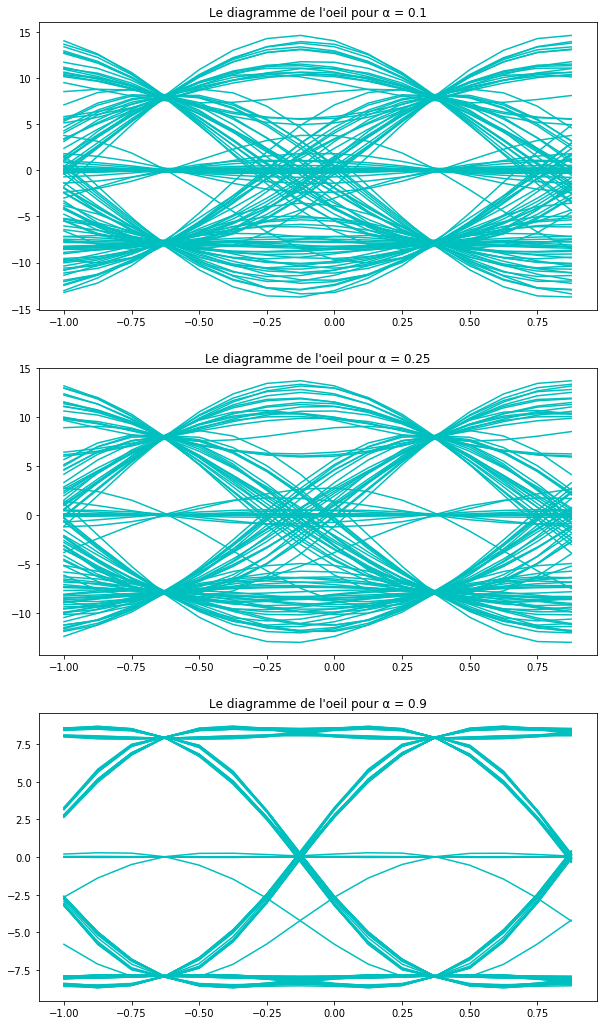

In [19]:
plt.figure(figsize=(10,18))

K = 8
t = np.linspace(-K*Tb, K*Tb, 128)

t0 = 0.5


plt.subplot(311)

z = np.convolve(e1,gr(t0,t,0.1))
drawFullEyeDiagram(z)
plt.title("Le diagramme de l'oeil pour \u03B1 = 0.1")

plt.subplot(312)

z = np.convolve(e2,gr(t0,t,0.25))
drawFullEyeDiagram(z)
plt.title("Le diagramme de l'oeil pour \u03B1 = 0.25")

plt.subplot(313)

z = np.convolve(e3,gr(t0,t,0.9))
drawFullEyeDiagram(z)
plt.title("Le diagramme de l'oeil pour \u03B1 = 0.9")


plt.show()


###### Interprétation de l'ouverture horizontale

Plus $\alpha$ augmente, plus l'ouverture horizontale du diagramme de l'oeil s'élargie. On voit bien que pour $\alpha = 0.9$, l'ouverture horizontale de l'oeil est la plus large et les interferences sont les plus faibles. 

Ce résultat était prévisible car en dessinant le filtre de mise en forme nous avons remarqué que plus $\alpha$ augemnte moins on a de lobes secondaires.

#####  3. Le diagramme de l'oeil pour les differentes valeurs de $K$ $(K=2,K=4,K=8)$ et pour une valeur fixée de $\alpha = 0.25$.

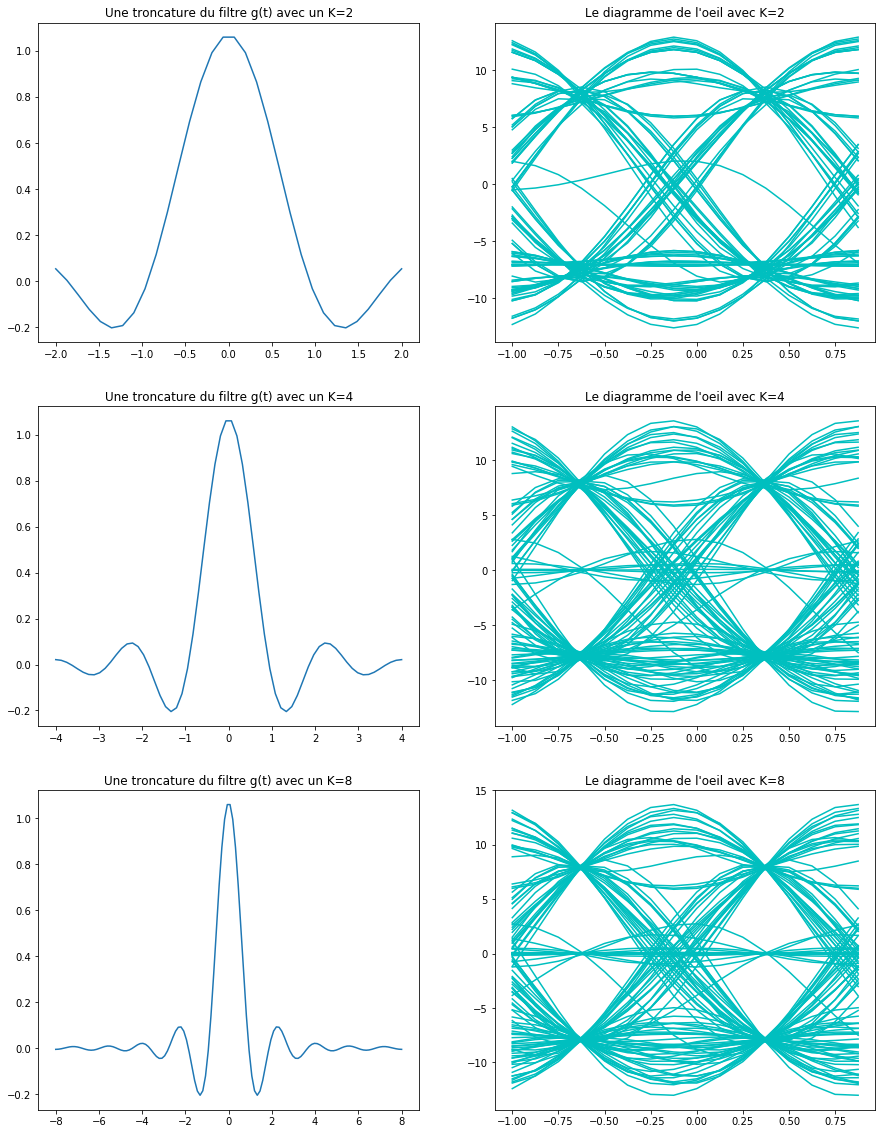

In [20]:
plt.figure(figsize=(15,20))

t0 = 0.5

plt.subplot(321)
K = 2
t = np.linspace(-K*Tb, K*Tb, K*16)
plt.plot(t, g1(t,0.25))
plt.title('Une troncature du filtre g(t) avec un K=2')

plt.subplot(322)
e1 = np.convolve(ak,g1(t,0.25)) 
z = np.convolve(e1,gr(t0,t,0.25))
drawFullEyeDiagram(z)
plt.title("Le diagramme de l'oeil avec K=2")

plt.subplot(323)
K=4
t = np.linspace(-K*Tb, K*Tb, K*16)
plt.plot(t, g1(t,0.25))
plt.title('Une troncature du filtre g(t) avec un K=4')

plt.subplot(324)
e1 = np.convolve(ak,g1(t,0.25)) 
z = np.convolve(e1,gr(t0,t,0.25))
drawFullEyeDiagram(z)
plt.title("Le diagramme de l'oeil avec K=4")

plt.subplot(325)
K=8
t= np.linspace(-K*Tb, K*Tb, K*16)
plt.plot(t, g1(t,0.25))
plt.title('Une troncature du filtre g(t) avec un K=8')


plt.subplot(326)
e1 = np.convolve(ak,g1(t,0.25)) 
z = np.convolve(e1,gr(t0,t,0.25))
drawFullEyeDiagram(z)
plt.title("Le diagramme de l'oeil avec K=8")



plt.show()



###### Interprétation de l'ouverture verticale
Pour un $\alpha = 0.25$ fixé, plus la valeur de $K$ est faible, plus la trancature de $g(t)$ est sévère et donc moins le filtre possède de lobes secondaires. 

Plus la valeur de $K$ augemente, plus l'interference entre symboles est grande et ceci on peut le voir à travers l'ouverture verticale 

##### 4. & 5. & 6.
Après l'étude de chaque bloc, dans cette derniere partie, nous allons reprodruire toute la chaine de transmission, faire varier les variables qui agissent sur cette chaine, calculer le taux d'erreur binaire (BER) et dessiner a chaque le signal d'entré et le signal de sortie.

###### Chaine de transmission du signal sans bruit

In [28]:
def chaine_transmission_sans_bruit(t0, alpha, K, A, N=1000, F=8):
    
    #signal source 
    s = np.array([random.randint(0,1) for x in range(N)])
    
    #codage de Gray
    a = 2*A*s - A
    
    #echantillonage
    echant = np.zeros(N*F)
    for i in range(N) :
        echant[8*i] = a[i]
    
    t = np.linspace(-K*Tb, K*Tb, K*16)
    
    #passage par le filtre de mise en forme
    e = np.convolve(echant,g1(t,alpha))
    
    #faire un déphasage pour que le filtre g(t) soit causal
    e = e[K*F:len(e)-(K*F)]
    
    #passage par le filtre adapté
    z = np.convolve(e,gr(t0,t,alpha))

    #faire un déphasage pour le filtre gr(t) soit causal 
    z = z[K*F:len(z)-(K*F)]
    y = np.zeros(N)
    #echantillonage du signal de sortie
    for i in range(N): 
        y[i] = z[8*i+1] 

    a_hat = (y>0).astype(int)
    #TEB : Taux d'erreur binaire
    TEB = (((a_hat-s)**2).sum())/N
    
    return(s,a_hat,TEB)

Dans cette partie nous allons fixer $t_0 = 0.3$ et faire varier le $\alpha$.

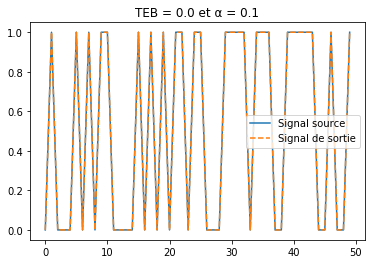

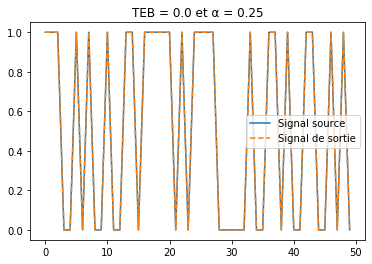

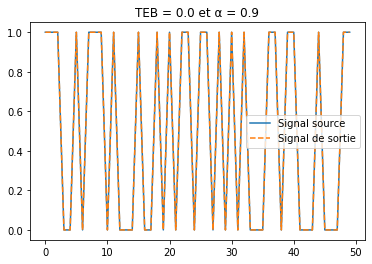

In [40]:
alphas=[0.1,0.25,0.9]

for i in alphas :
    s1,a_hat1, TEB = chaine_transmission_sans_bruit(t0=0.3, alpha=i, K=8, A=1, N=1000, F=8)
    plt.plot(s1[:50], label="Signal source")
    plt.plot(a_hat1[:50],"--",label="Signal de sortie")
    plt.title("TEB = "+ str(TEB)+" et \u03B1 = "+ str(i))
    plt.legend()
    plt.show()

Dans cette partie nous allons fixer $t_0 = 0.7$ et faire varier le $\alpha$.

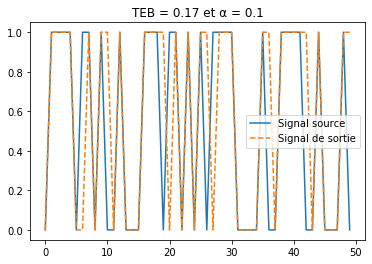

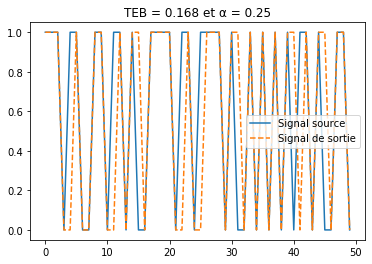

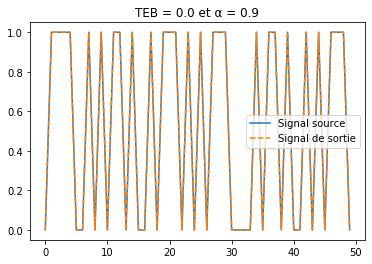

In [41]:
alphas=[0.1,0.25,0.9]

for i in alphas :
    s1,a_hat1, TEB = chaine_transmission_sans_bruit(t0=0.7, alpha=i, K=8, A=1, N=1000, F=8)
    plt.plot(s1[:50], label="Signal source")
    plt.plot(a_hat1[:50],"--",label="Signal de sortie")
    plt.title("TEB = "+ str(TEB)+" et \u03B1 = "+ str(i))
    plt.legend()
    plt.show()

On constate que pour un signal transmis sans ajout de bruit et pour une valeur de $t_0$ à laquelle l'ouverture de l'oeil est maximale ($t_0 = 0.3$), le TEB est null (Transmission parfaite du signal) pour les differentes $\alpha$ . Alors que pour une valeur de $t_0$ où il y interference entre symboles ($t_0=0.7$), le TEB diminue quand $\alpha$ augemente.

###### Chaine de transmission avec bruit

In [44]:
def chaine_transmission_avec_bruit(t0, alpha, K, A, N, F, SNR):


     #signal source 
    s = np.array([random.randint(0,1) for x in range(N)])
    
    #codage de Gray
    a = 2*A*s - A
    
    #echantillonage
    echant = np.zeros(N*F)
    for i in range(N) :
        echant[8*i] = a[i]
    
    t = np.linspace(-K*Tb, K*Tb, K*16)
    
    #passage par le filtre de mise en forme
    e = np.convolve(echant,g1(t,alpha))
    
    #faire un déphasage pour que le filtre g(t) soit causal
    e = e[K*F:len(e)-(K*F)]
    
    #addition de bruit
    e = bruit(SNR,e) 
    
    #passage par le filtre adapté
    z = np.convolve(e,gr(t0,t,alpha))

    #faire un déphasage pour le filtre gr(t) soit causal 
    z = z[K*F:len(z)-(K*F)]
    y = np.zeros(N)
    #echantillonage du signal de sortie
    for i in range(N): 
        y[i] = z[8*i+1] 

    a_hat = (y>0).astype(int)
    #TEB : Taux d'erreur binaire
    TEB = (((a_hat-s)**2).sum())/N
    return(s,a_hat,TEB)

Dans cette partie nous allons fixer $\alpha =0.25$, $t_0=0.3$ et faire varier le SNR.

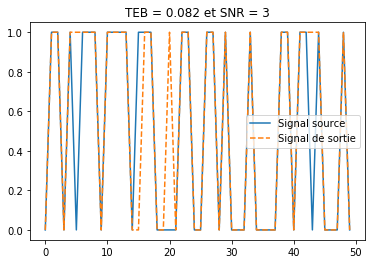

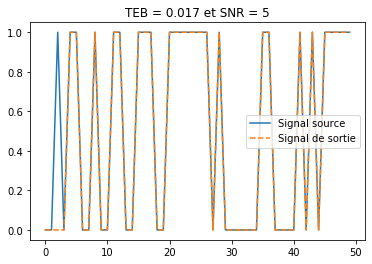

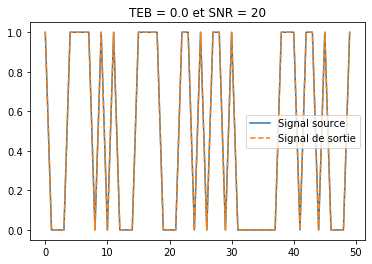

In [47]:
SNRs = [3,5,20]

for i in SNRs :
    s1,a_hat1, TEB = chaine_transmission_avec_bruit(t0=0.3, alpha=0.25, K=8, A=1, N=1000, F=8, SNR=i)
    plt.plot(s1[:50], label="Signal source")
    plt.plot(a_hat1[:50],"--",label="Signal de sortie")
    plt.title("TEB = "+ str(TEB)+" et SNR = "+ str(i))
    plt.legend()
    plt.show()

On voit bien que pour un $\alpha$ et $t_0$ fixés, plus le SNR est important moins qu'on a des erreurs dans la transmission ($TEB$ tend vers 0)